* Nombre: Carlos Felipe Niño Rodríguez.
* Universidad el Bosque.
* BigData.
* Profesor: Fabian Peña.

# Taller 3

1. Para construir un mejor modelo se requieren más datos etiquetados.
2. El entrenamiento se está realizando con datos mal etiquetados. 
3. El modelo de Logistic Regression no es suficiente para lograr una discriminación adecuada de los tweets.

Se etiquetaron más datos anteriormente, por lo tanto vamos a volver a hacer lo que se había hecho en la clase para mostrar la precision de LogisticRegression y luego si seguir con los otros algoritmos:

In [1]:
import string
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score

**En results guardaremos los mejores puntajes de precisión capturados por cada algoritmo, en results_name guardaremos el nombre del algoritmo teniendo en cuenta si se hizo con BOW o con TF-IDF, por último en parametros_results guardaremos los parámetros de ese algoritmo para obtener la precisión obtenida.**

In [2]:
results = []
results_name = []
parametros_results =[]
recall_results = []
f1_results = []

In [3]:
stop_words = set(stopwords.words('spanish'))

In [4]:
def tokenizer(text):
    tt = TweetTokenizer()
    return tt.tokenize(text)

In [5]:
# Dataset loaded from: https://docs.google.com/spreadsheets/d/1I3qXro6Hy4UiTmC68axmuC3Qqrj_9YEKSzFILizyl3A/edit?usp=sharing
tweets_df = pd.read_csv('./data/medellin_tweets.csv', sep = ',')
tweets_df.head()

,full_text,sentiment
0,@hugouribev: @isamg6 @MOinternationa @petrogus...,0.0
1,"@maridelas18: Fueraaa, Petro de Medellín",0.0
2,@MunozEnith: Medellín se lució hoy. El repudio...,0.0
3,@isamg6: La historia contará que en Medellín s...,0.0
4,@funurbiano: Los del asalto a la fundidora de ...,0.0


In [6]:
tweets_df['sentiment'].value_counts(dropna = False)

NaN    4638
0.0     751
1.0     647
Name: sentiment, dtype: int64

In [7]:
tweets_df['sentiment'].value_counts(dropna = False, normalize = True)

NaN    0.76839
0.0    0.12442
1.0    0.10719
Name: sentiment, dtype: float64

### Leaving out unlabeled texts, this data is not useful for training or validating a supervised model

In [8]:
tweets_labeled_df = tweets_df.loc[tweets_df['sentiment'].notnull()]
tweets_labeled_df.shape

(1398, 2)

In [9]:
tweets_nolabeled_df = tweets_df.loc[tweets_df['sentiment'].isnull()]
tweets_nolabeled_df.shape

(4638, 2)

### Splitting train and test datasets

In [10]:
X_train, X_test, y_train, y_test = train_test_split(tweets_labeled_df['full_text'], tweets_labeled_df['sentiment'], test_size = 0.2, stratify = tweets_labeled_df['sentiment'], random_state = 1)

In [11]:
pd.Series(y_train).value_counts(normalize = True)

0.0    0.537567
1.0    0.462433
Name: sentiment, dtype: float64

In [12]:
pd.Series(y_test).value_counts(normalize = True)

0.0    0.535714
1.0    0.464286
Name: sentiment, dtype: float64

### Vectorizing texts

In [13]:
bow = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)
tfidf = TfidfVectorizer(tokenizer = tokenizer, stop_words = stop_words)
X_bow = bow.fit_transform(X_train)
X_tfidf = tfidf.fit_transform(X_train)

# Logistic Regression

### Training and evaluating a model using BOW

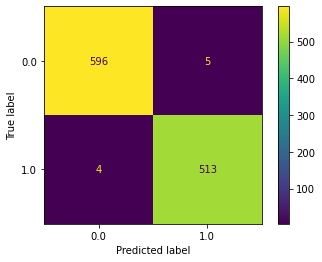

In [14]:
logistic_model = LogisticRegression(random_state = 2)
logistic_model.fit(X_bow, y_train)
y_train_bow_predict = logistic_model.predict(X_bow)
y_test_bow_predict = logistic_model.predict(bow.transform(X_test))
ConfusionMatrixDisplay.from_predictions(y_train, y_train_bow_predict)

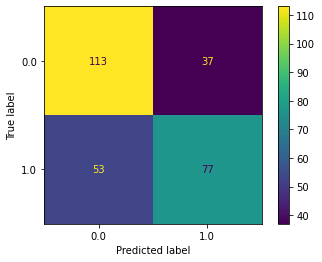

In [15]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_bow_predict)

In [16]:
print('Precisión:', precision_score(y_test, y_test_bow_predict))
print('Recall:', recall_score(y_test, y_test_bow_predict))
print('F1:', f1_score(y_test, y_test_bow_predict))

Precisión: 0.6754385964912281
Recall: 0.5923076923076923
F1: 0.6311475409836065


In [17]:
results_name.append('Logistic Regression_BOW')
results.append(precision_score(y_test, y_test_bow_predict))
parametros_results.append('random_state = 2')
recall_results.append(recall_score(y_test, y_test_bow_predict))
f1_results.append(f1_score(y_test, y_test_bow_predict))

### Training and evaluating a model using TF-IDF

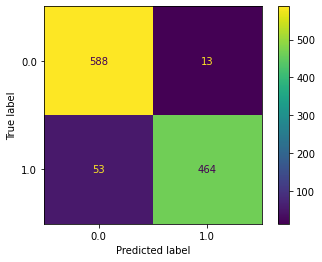

In [18]:
logistic_model = LogisticRegression(random_state = 2)
logistic_model.fit(X_tfidf, y_train)
y_train_tfidf_predict = logistic_model.predict(X_tfidf)
y_test_tfidf_predict = logistic_model.predict(bow.transform(X_test))
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

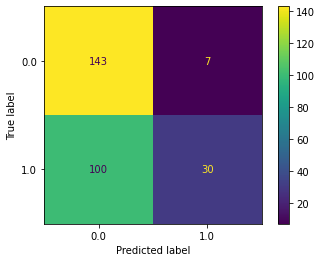

In [19]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)

In [20]:
print('Precisión:', precision_score(y_test, y_test_tfidf_predict))
print('Recall:', recall_score(y_test, y_test_tfidf_predict))
print('F1:', f1_score(y_test, y_test_tfidf_predict))

Precisión: 0.8108108108108109
Recall: 0.23076923076923078
F1: 0.3592814371257485


In [21]:
results_name.append('Logistic Regression_TF-IDF')
results.append(precision_score(y_test, y_test_tfidf_predict))
parametros_results.append('random_state = 2')
recall_results.append(recall_score(y_test, y_test_tfidf_predict))
f1_results.append(f1_score(y_test, y_test_tfidf_predict))

# Decision Trees

In [22]:
from sklearn.tree import DecisionTreeClassifier

## Usando BOW:

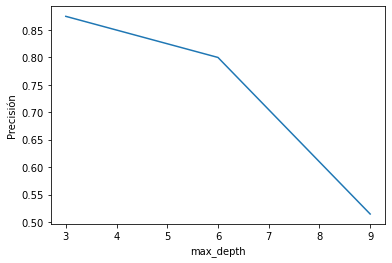

In [23]:
max_depth_range = [3,6,9]
precision = []
for depth in max_depth_range:
    trees_model = DecisionTreeClassifier(max_depth = depth)
    trees_model.fit(X_bow, y_train)
    y_test_bow_predict = trees_model.predict(bow.transform(X_test))
    score =  precision_score(y_test, y_test_bow_predict)
    precision.append(score)

plt.plot(max_depth_range, precision)
plt.xlabel('max_depth')
plt.ylabel('Precisión')
plt.show()

Como observamos la mejor precisión da con max_depth = 3:

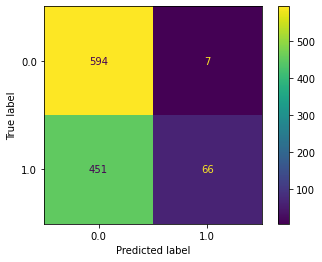

In [24]:
trees_model = DecisionTreeClassifier(max_depth = 3)
trees_model.fit(X_bow, y_train)
y_train_bow_predict = trees_model.predict(X_bow)
y_test_bow_predict = trees_model.predict(bow.transform(X_test))
ConfusionMatrixDisplay.from_predictions(y_train, y_train_bow_predict)

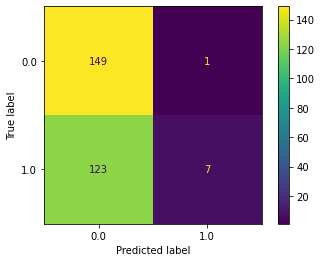

In [25]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_bow_predict)

In [26]:
print('Precisión:', precision_score(y_test, y_test_bow_predict))
print('Recall:', recall_score(y_test, y_test_bow_predict))
print('F1:', f1_score(y_test, y_test_bow_predict))

Precisión: 0.875
Recall: 0.05384615384615385
F1: 0.10144927536231883


In [27]:
results_name.append('Decision Trees_BOW')
results.append(precision_score(y_test, y_test_bow_predict))
parametros_results.append('max_depth = 3')
recall_results.append(recall_score(y_test, y_test_bow_predict))
f1_results.append(f1_score(y_test, y_test_bow_predict))

## Usando TF-IDF:

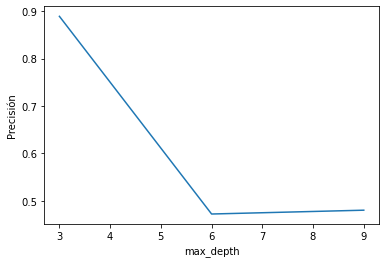

In [28]:
max_depth_range = [3,6,9]
precision = []
for depth in max_depth_range:
    trees_model = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    trees_model.fit(X_tfidf, y_train)
    y_test_tfidf_predict = trees_model.predict(bow.transform(X_test))
    score =  precision_score(y_test, y_test_tfidf_predict)
    precision.append(score)

plt.plot(max_depth_range, precision)
plt.xlabel('max_depth')
plt.ylabel('Precisión')
plt.show()

Como observamos la mejor precisión da con max_depth = 3:

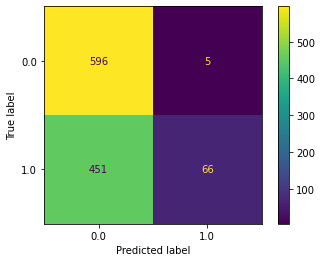

In [29]:
trees_model = DecisionTreeClassifier(max_depth = 3)
trees_model.fit(X_tfidf, y_train)
y_train_tfidf_predict = trees_model.predict(X_tfidf)
y_test_tfidf_predict = trees_model.predict(bow.transform(X_test))
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

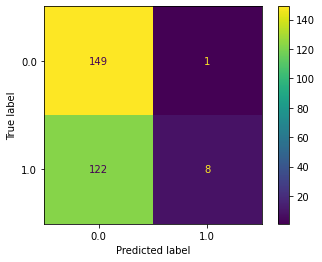

In [30]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)

In [31]:
print('Precisión:', precision_score(y_test, y_test_tfidf_predict))
print('Recall:', recall_score(y_test, y_test_tfidf_predict))
print('F1:', f1_score(y_test, y_test_tfidf_predict))

Precisión: 0.8888888888888888
Recall: 0.06153846153846154
F1: 0.11510791366906475


In [32]:
results_name.append('Decision Trees_TF-IDF')
results.append(precision_score(y_test, y_test_tfidf_predict))
parametros_results.append('max_depth = 3')
recall_results.append(recall_score(y_test, y_test_tfidf_predict))
f1_results.append(f1_score(y_test, y_test_tfidf_predict))

# Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

## Usando BOW:

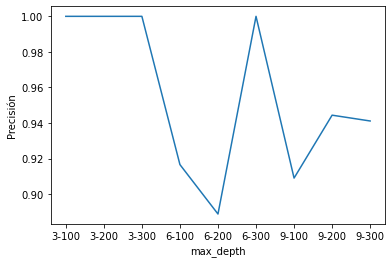

In [34]:
max_depth_range = [3,6,9]
n_estimators = [100,200,300]
precision = []
reca = []
f = []
for depth in max_depth_range:
    for n in n_estimators:
        forest_model = RandomForestClassifier(max_depth = depth, n_estimators = n)
        forest_model.fit(X_bow, y_train)
        y_test_bow_predict = forest_model.predict(bow.transform(X_test))
        score =  precision_score(y_test, y_test_bow_predict)
        recall = recall_score(y_test, y_test_bow_predict)
        fsc = f1_score(y_test, y_test_bow_predict)
        precision.append(score)
        reca.append(recall)
        f.append(fsc)

plt.plot(['3-100','3-200','3-300','6-100','6-200','6-300','9-100','9-200','9-300'], precision)
plt.xlabel('max_depth')
plt.ylabel('Precisión')
plt.show()

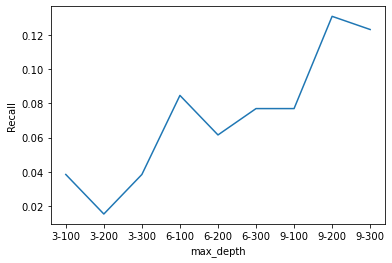

In [35]:
plt.plot(['3-100','3-200','3-300','6-100','6-200','6-300','9-100','9-200','9-300'], reca)
plt.xlabel('max_depth')
plt.ylabel('Recall')
plt.show()

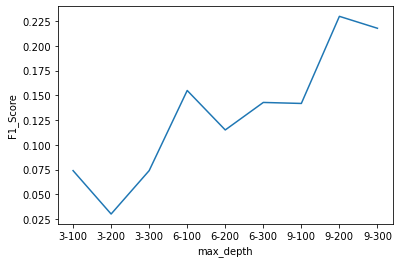

In [36]:
plt.plot(['3-100','3-200','3-300','6-100','6-200','6-300','9-100','9-200','9-300'], f)
plt.xlabel('max_depth')
plt.ylabel('F1_Score')
plt.show()

Como observamos los que tienen mejor precisión son:
* max_depth = 3, n_estimators = 100
* max_depth = 3, n_estimators = 200
* max_depth = 3, n_estimators = 300
* max_depth = 6, n_estimators = 300

Pero el que tiene mejor recall (Habilidad del clasificador para encontrar muestras positivas) y  F1_score es:
* max_depth = 6, n_estimators = 300

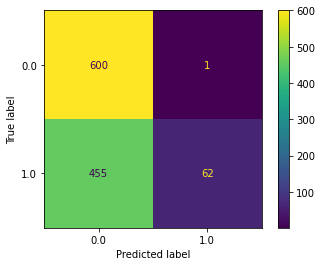

In [37]:
forest_model = RandomForestClassifier(max_depth = 6, n_estimators = 300)
forest_model.fit(X_bow, y_train)
y_train_bow_predict = forest_model.predict(X_bow)
y_test_bow_predict = forest_model.predict(bow.transform(X_test))
ConfusionMatrixDisplay.from_predictions(y_train, y_train_bow_predict)

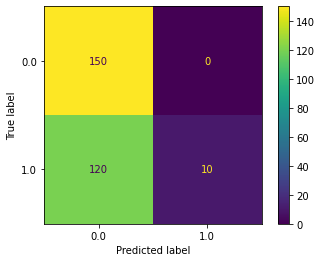

In [38]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_bow_predict)

In [39]:
print('Precisión:', precision_score(y_test, y_test_bow_predict))
print('Recall:', recall_score(y_test, y_test_bow_predict))
print('F1:', f1_score(y_test, y_test_bow_predict))

Precisión: 1.0
Recall: 0.07692307692307693
F1: 0.14285714285714288


In [40]:
results_name.append('Random Forest_BOW')
results.append(precision_score(y_test, y_test_bow_predict))
parametros_results.append('max_depth = 6, n_estimators = 300')
recall_results.append(recall_score(y_test, y_test_bow_predict))
f1_results.append(f1_score(y_test, y_test_bow_predict))

## Usando TF-IDF:

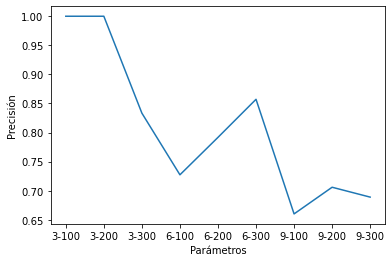

In [41]:
max_depth_range = [3,6,9]
n_estimators = [100,200,300]
precision = []
reca = []
f = []
for depth in max_depth_range:
    for n in n_estimators:
        forest_model = RandomForestClassifier(max_depth = depth, n_estimators = n)
        forest_model.fit(X_tfidf, y_train)
        y_test_tfidf_predict = forest_model.predict(bow.transform(X_test))
        score =  precision_score(y_test, y_test_tfidf_predict)
        recall = recall_score(y_test, y_test_tfidf_predict)
        fsc = f1_score(y_test, y_test_tfidf_predict)
        precision.append(score)
        reca.append(recall)
        f.append(fsc)

plt.plot(['3-100','3-200','3-300','6-100','6-200','6-300','9-100','9-200','9-300'], precision)
plt.xlabel('Parámetros')
plt.ylabel('Precisión')
plt.show()

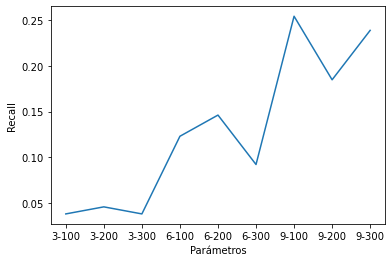

In [42]:
plt.plot(['3-100','3-200','3-300','6-100','6-200','6-300','9-100','9-200','9-300'], reca)
plt.xlabel('Parámetros')
plt.ylabel('Recall')
plt.show()

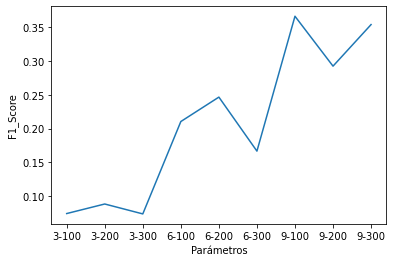

In [43]:
plt.plot(['3-100','3-200','3-300','6-100','6-200','6-300','9-100','9-200','9-300'], f)
plt.xlabel('Parámetros')
plt.ylabel('F1_Score')
plt.show()

Como observamos los que tienen mejor precisión es:
* max_depth = 3, n_estimators = 100
* max_depth = 3, n_estimators = 200

Pero el que tiene mejor recall (Habilidad del clasificador para encontrar muestras positivas) y F1_score es:
* max_depth = 3, n_estimators = 200 

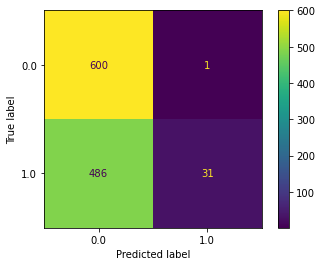

In [44]:
forest_model = RandomForestClassifier(max_depth = 3, n_estimators = 200)
forest_model.fit(X_tfidf, y_train)
y_train_tfidf_predict = forest_model.predict(X_tfidf)
y_test_tfidf_predict = forest_model.predict(bow.transform(X_test))
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

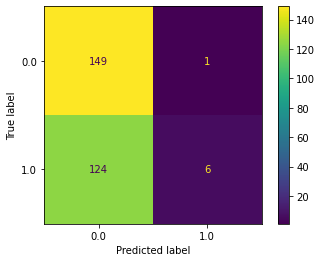

In [45]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)

In [47]:
print('Precisión:', precision_score(y_test, y_test_tfidf_predict))
print('Recall:', recall_score(y_test, y_test_tfidf_predict))
print('F1:', f1_score(y_test, y_test_tfidf_predict))

Precisión: 0.8571428571428571
Recall: 0.046153846153846156
F1: 0.08759124087591241


In [48]:
results_name.append('Random Forest_TF-IDF')
results.append(precision_score(y_test, y_test_tfidf_predict))
parametros_results.append('max_depth = 3, n_estimators = 200')
recall_results.append(recall_score(y_test, y_test_tfidf_predict))
f1_results.append(f1_score(y_test, y_test_tfidf_predict))

# Support Vector Machines

In [49]:
from sklearn.svm import SVC

## Usando BOW:

C:\Users\fnino\anaconda3\envs\ambiente\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fnino\anaconda3\envs\ambiente\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fnino\anaconda3\envs\ambiente\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fnino\anaconda3\envs\ambiente\lib\site-packages\sklearn\metrics\_cl

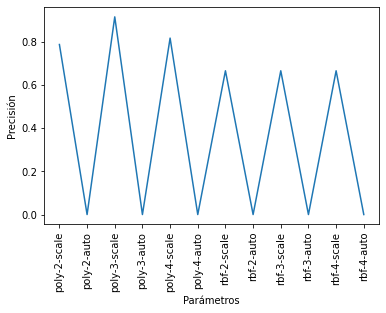

In [50]:
kernel = ['poly','rbf']
degree = [2,3,4]
gamma = ['scale','auto']
precision = []
reca = []
f = []
for k in kernel:
    for d in degree:
        for g in gamma:
            svc_model = SVC(kernel = k, degree = d, gamma = g)
            svc_model.fit(X_bow, y_train)
            y_test_bow_predict = svc_model.predict(bow.transform(X_test))
            score =  precision_score(y_test, y_test_bow_predict)
            recall = recall_score(y_test, y_test_bow_predict)
            fsc = f1_score(y_test, y_test_bow_predict)
            precision.append(score)
            reca.append(recall)
            f.append(fsc)

plt.plot(['poly-2-scale','poly-2-auto',
          'poly-3-scale','poly-3-auto',
          'poly-4-scale','poly-4-auto',
          'rbf-2-scale','rbf-2-auto',
          'rbf-3-scale','rbf-3-auto',
          'rbf-4-scale','rbf-4-auto'], precision)
plt.xticks(rotation=90)
plt.xlabel('Parámetros')
plt.ylabel('Precisión')
plt.show()

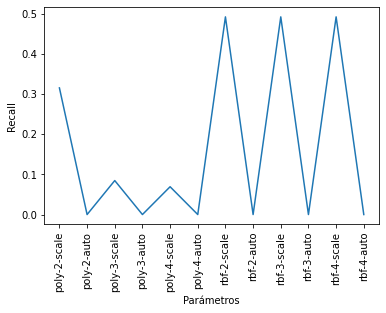

In [51]:
plt.plot(['poly-2-scale','poly-2-auto',
          'poly-3-scale','poly-3-auto',
          'poly-4-scale','poly-4-auto',
          'rbf-2-scale','rbf-2-auto',
          'rbf-3-scale','rbf-3-auto',
          'rbf-4-scale','rbf-4-auto'], reca)
plt.xticks(rotation=90)
plt.xlabel('Parámetros')
plt.ylabel('Recall')
plt.show()

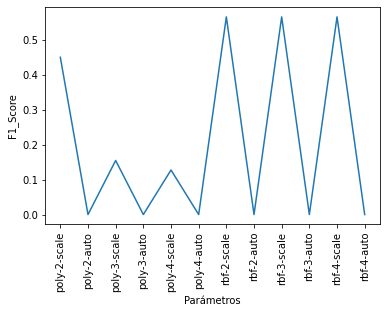

In [52]:
plt.plot(['poly-2-scale','poly-2-auto',
          'poly-3-scale','poly-3-auto',
          'poly-4-scale','poly-4-auto',
          'rbf-2-scale','rbf-2-auto',
          'rbf-3-scale','rbf-3-auto',
          'rbf-4-scale','rbf-4-auto'], f)
plt.xticks(rotation=90)
plt.xlabel('Parámetros')
plt.ylabel('F1_Score')
plt.show()

Como observamos los que tienen mejor precisión es:
* kernel = 'poly', degree = 3, gamma = 'scale

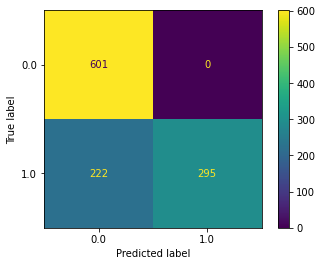

In [53]:
svc_model = SVC(kernel = 'poly', degree = 3, gamma = 'scale')
svc_model.fit(X_bow, y_train)
y_train_bow_predict = svc_model.predict(X_bow)
y_test_bow_predict = svc_model.predict(bow.transform(X_test))
ConfusionMatrixDisplay.from_predictions(y_train, y_train_bow_predict)

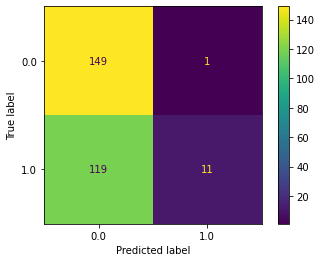

In [54]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_bow_predict)

In [55]:
print('Precisión:', precision_score(y_test, y_test_bow_predict))
print('Recall:', recall_score(y_test, y_test_bow_predict))
print('F1:', f1_score(y_test, y_test_bow_predict))

Precisión: 0.9166666666666666
Recall: 0.08461538461538462
F1: 0.15492957746478875


In [56]:
results_name.append('SVM_BOW')
results.append(precision_score(y_test, y_test_bow_predict))
parametros_results.append("kernel = 'poly', degree = 3, gamma = 'scale'")
recall_results.append(recall_score(y_test, y_test_bow_predict))
f1_results.append(f1_score(y_test, y_test_bow_predict))

## Usando TF-IDF:

C:\Users\fnino\anaconda3\envs\ambiente\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fnino\anaconda3\envs\ambiente\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fnino\anaconda3\envs\ambiente\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fnino\anaconda3\envs\ambiente\lib\site-packages\sklearn\metrics\_cl

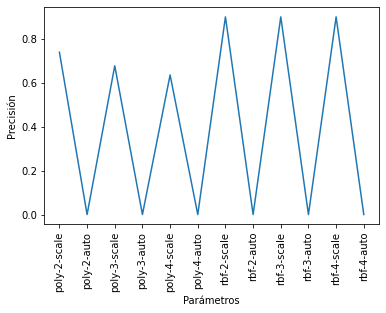

In [57]:
kernel = ['poly','rbf']
degree = [2,3,4]
gamma = ['scale','auto']
precision = []
reca = []
f = []
for k in kernel:
    for d in degree:
        for g in gamma:
            svc_model = SVC(kernel = k, degree = d, gamma = g)
            svc_model.fit(X_tfidf, y_train)
            y_test_tfidf_predict = svc_model.predict(bow.transform(X_test))
            score =  precision_score(y_test, y_test_tfidf_predict)
            recall = recall_score(y_test, y_test_tfidf_predict)
            fsc = f1_score(y_test, y_test_tfidf_predict)
            precision.append(score)
            reca.append(recall)
            f.append(fsc)

plt.plot(['poly-2-scale','poly-2-auto',
          'poly-3-scale','poly-3-auto',
          'poly-4-scale','poly-4-auto',
          'rbf-2-scale','rbf-2-auto',
          'rbf-3-scale','rbf-3-auto',
          'rbf-4-scale','rbf-4-auto'], precision)
plt.xticks(rotation=90)
plt.xlabel('Parámetros')
plt.ylabel('Precisión')
plt.show()

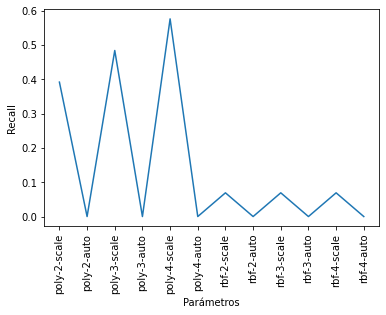

In [58]:
plt.plot(['poly-2-scale','poly-2-auto',
          'poly-3-scale','poly-3-auto',
          'poly-4-scale','poly-4-auto',
          'rbf-2-scale','rbf-2-auto',
          'rbf-3-scale','rbf-3-auto',
          'rbf-4-scale','rbf-4-auto'], reca)
plt.xticks(rotation=90)
plt.xlabel('Parámetros')
plt.ylabel('Recall')
plt.show()

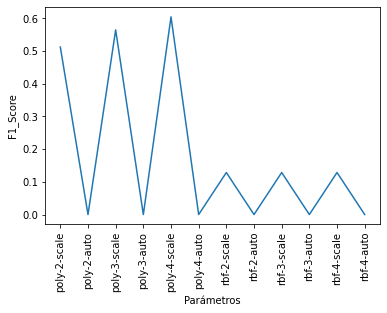

In [59]:
plt.plot(['poly-2-scale','poly-2-auto',
          'poly-3-scale','poly-3-auto',
          'poly-4-scale','poly-4-auto',
          'rbf-2-scale','rbf-2-auto',
          'rbf-3-scale','rbf-3-auto',
          'rbf-4-scale','rbf-4-auto'], f)
plt.xticks(rotation=90)
plt.xlabel('Parámetros')
plt.ylabel('F1_Score')
plt.show()

Como observamos los que tienen mejor precisión son:
* kernel = 'rbf', degree = 2, gamma = 'scale'
* kernel = 'rbf', degree = 3, gamma = 'scale'
* kernel = 'rbf', degree = 4, gamma = 'scale'

Todos tienen el mismo recall y el mismo f1_score.

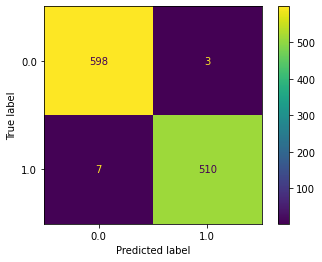

In [60]:
svc_model = SVC(kernel = 'rbf', degree = 2, gamma = 'scale')
svc_model.fit(X_tfidf, y_train)
y_train_tfidf_predict = svc_model.predict(X_tfidf)
y_test_tfidf_predict = svc_model.predict(bow.transform(X_test))
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

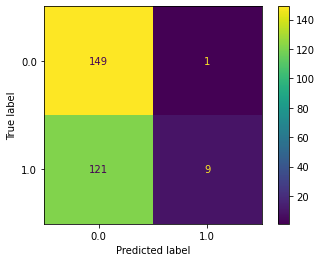

In [61]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)

In [62]:
print('Precisión:', precision_score(y_test, y_test_tfidf_predict))
print('Recall:', recall_score(y_test, y_test_tfidf_predict))
print('F1:', f1_score(y_test, y_test_tfidf_predict))

Precisión: 0.9
Recall: 0.06923076923076923
F1: 0.1285714285714286


In [63]:
results_name.append('SVM_TF-IDF')
results.append(precision_score(y_test, y_test_tfidf_predict))
parametros_results.append('max_depth = 3, n_estimators = 300')
recall_results.append(recall_score(y_test, y_test_tfidf_predict))
f1_results.append(f1_score(y_test, y_test_tfidf_predict))

# K-Nearest Neighborhoods

In [64]:
from sklearn.neighbors import KNeighborsClassifier

## Usando BOW:

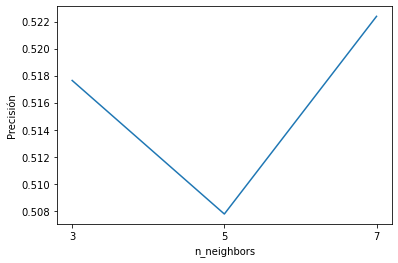

In [65]:
neighbors = [3,5,7]
precision = []
reca = []
f = []
for n in neighbors:
    Kneighbors_model = KNeighborsClassifier(n_neighbors = n)
    Kneighbors_model.fit(X_bow, y_train)
    y_test_bow_predict = Kneighbors_model.predict(bow.transform(X_test))
    score =  precision_score(y_test, y_test_bow_predict)
    recall = recall_score(y_test, y_test_bow_predict)
    fsc = f1_score(y_test, y_test_bow_predict)
    precision.append(score)
    reca.append(recall)
    f.append(fsc)
    
plt.plot(['3','5','7'], precision)
plt.xlabel('n_neighbors')
plt.ylabel('Precisión')
plt.show()

Como observamos la mejor precisión da con n_neighbors = 7:

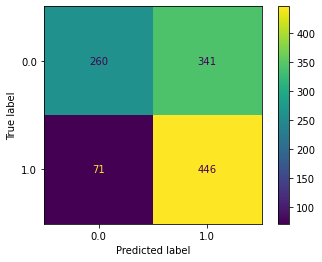

In [66]:
Kneighbors_model = KNeighborsClassifier(n_neighbors = 7)
Kneighbors_model.fit(X_bow, y_train)
y_train_bow_predict = Kneighbors_model.predict(X_bow)
y_test_bow_predict = Kneighbors_model.predict(bow.transform(X_test))
ConfusionMatrixDisplay.from_predictions(y_train, y_train_bow_predict)

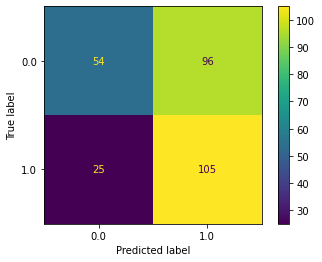

In [67]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_bow_predict)

In [68]:
print('Precisión:', precision_score(y_test, y_test_bow_predict))
print('Recall:', recall_score(y_test, y_test_bow_predict))
print('F1:', f1_score(y_test, y_test_bow_predict))

Precisión: 0.5223880597014925
Recall: 0.8076923076923077
F1: 0.634441087613293


In [69]:
results_name.append('K-Nearest_BOW')
results.append(precision_score(y_test, y_test_bow_predict))
parametros_results.append('n_neighbors = 7')
recall_results.append(recall_score(y_test, y_test_bow_predict))
f1_results.append(f1_score(y_test, y_test_bow_predict))

## Usando TF-IDF:

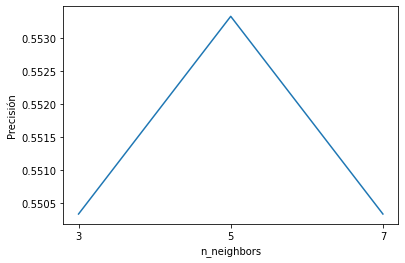

In [70]:
neighbors = [3,5,7]
precision = []
reca = []
f = []
for n in neighbors:
    Kneighbors_model = KNeighborsClassifier(n_neighbors = n)
    Kneighbors_model.fit(X_tfidf, y_train)
    y_test_tfidf_predict = Kneighbors_model.predict(bow.transform(X_test))
    score =  precision_score(y_test, y_test_tfidf_predict)
    recall = recall_score(y_test, y_test_tfidf_predict)
    fsc = f1_score(y_test, y_test_tfidf_predict)
    precision.append(score)
    reca.append(recall)
    f.append(fsc)
    
plt.plot(['3','5','7'], precision)
plt.xlabel('n_neighbors')
plt.ylabel('Precisión')
plt.show()

Como observamos la mejor precisión da con n_neighbors = 5:

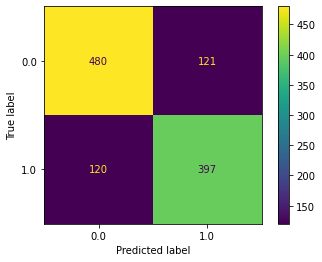

In [71]:
Kneighbors_model = KNeighborsClassifier(n_neighbors = 5)
Kneighbors_model.fit(X_tfidf, y_train)
y_train_tfidf_predict = Kneighbors_model.predict(X_tfidf)
y_test_tfidf_predict = Kneighbors_model.predict(bow.transform(X_test))
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

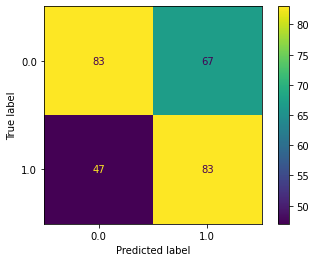

In [72]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)

In [73]:
print('Precisión:', precision_score(y_test, y_test_tfidf_predict))
print('Recall:', recall_score(y_test, y_test_tfidf_predict))
print('F1:', f1_score(y_test, y_test_tfidf_predict))

Precisión: 0.5533333333333333
Recall: 0.6384615384615384
F1: 0.5928571428571429


In [74]:
results_name.append('K-Nearest_TF-IDF')
results.append(precision_score(y_test, y_test_tfidf_predict))
parametros_results.append('n_neighbors = 5')
recall_results.append(recall_score(y_test, y_test_tfidf_predict))
f1_results.append(f1_score(y_test, y_test_tfidf_predict))

# Multinomial Naive-Bayes

In [75]:
from sklearn.naive_bayes import MultinomialNB

## Usando BOW:

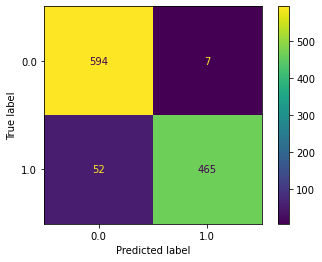

In [76]:
multi_model = MultinomialNB()
multi_model.fit(X_bow, y_train)
y_train_bow_predict = multi_model.predict(X_bow)
y_test_bow_predict = multi_model.predict(bow.transform(X_test))
ConfusionMatrixDisplay.from_predictions(y_train, y_train_bow_predict)

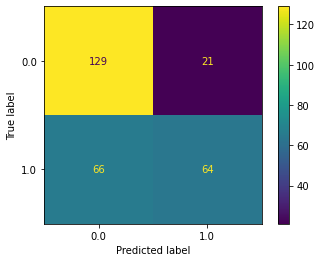

In [77]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_bow_predict)

In [78]:
print('Precisión:', precision_score(y_test, y_test_bow_predict))
print('Recall:', recall_score(y_test, y_test_bow_predict))
print('F1:', f1_score(y_test, y_test_bow_predict))

Precisión: 0.7529411764705882
Recall: 0.49230769230769234
F1: 0.5953488372093023


In [79]:
results_name.append('Multinomial_BOW')
results.append(precision_score(y_test, y_test_bow_predict))
parametros_results.append('')
recall_results.append(recall_score(y_test, y_test_bow_predict))
f1_results.append(f1_score(y_test, y_test_bow_predict))

## Usando TF-IDF:

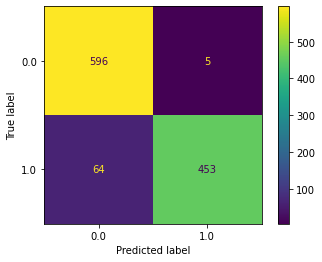

In [80]:
multi_model = MultinomialNB()
multi_model.fit(X_tfidf, y_train)
y_train_tfidf_predict = multi_model.predict(X_tfidf)
y_test_tfidf_predict = multi_model.predict(bow.transform(X_test))
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

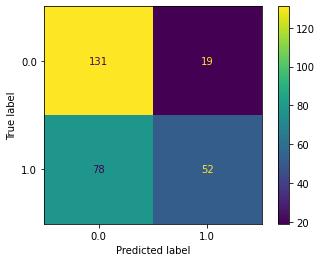

In [81]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)

In [82]:
print('Precisión:', precision_score(y_test, y_test_tfidf_predict))
print('Recall:', recall_score(y_test, y_test_tfidf_predict))
print('F1:', f1_score(y_test, y_test_tfidf_predict))

Precisión: 0.7323943661971831
Recall: 0.4
F1: 0.5174129353233831


In [83]:
results_name.append('Multinomial_TF-IDF')
results.append(precision_score(y_test, y_test_tfidf_predict))
parametros_results.append('')
recall_results.append(recall_score(y_test, y_test_tfidf_predict))
f1_results.append(f1_score(y_test, y_test_tfidf_predict))

# Neuronal Networks

In [84]:
from sklearn.neural_network import MLPClassifier

## Usando BOW:

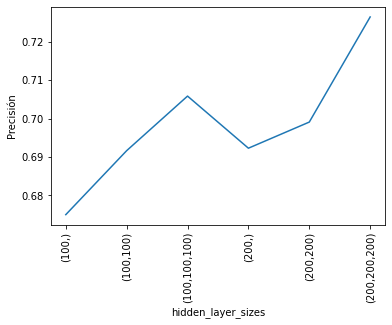

In [85]:
hidden_layer = [(100,),(100,100),(100,100,100),(200,),(200,200),(200,200,200)]
precision = []
for h in hidden_layer:
    neuronal_model = MLPClassifier(hidden_layer_sizes = h)
    neuronal_model.fit(X_bow, y_train)
    y_test_bow_predict = neuronal_model.predict(bow.transform(X_test))
    score =  precision_score(y_test, y_test_bow_predict)
    precision.append(score)
    
plt.plot(['(100,)','(100,100)','(100,100,100)','(200,)','(200,200)','(200,200,200)'], precision)
plt.xticks(rotation=90)
plt.xlabel('hidden_layer_sizes')
plt.ylabel('Precisión')
plt.show()

Como observamos la mejor precisión da con hidden_layer_sizes = (200,200,200):

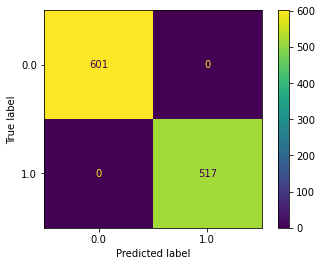

In [86]:
neuronal_model = MLPClassifier(hidden_layer_sizes = (200,200,200))
neuronal_model.fit(X_bow, y_train)
y_train_bow_predict = neuronal_model.predict(X_bow)
y_test_bow_predict = neuronal_model.predict(bow.transform(X_test))
ConfusionMatrixDisplay.from_predictions(y_train, y_train_bow_predict)

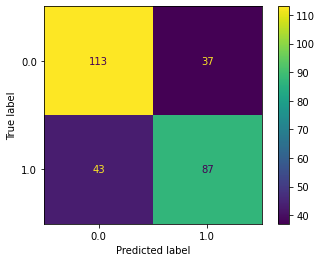

In [87]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_bow_predict)

In [88]:
print('Precisión:', precision_score(y_test, y_test_bow_predict))
print('Recall:', recall_score(y_test, y_test_bow_predict))
print('F1:', f1_score(y_test, y_test_bow_predict))

Precisión: 0.7016129032258065
Recall: 0.6692307692307692
F1: 0.6850393700787403


In [89]:
results_name.append('Neuronal_BOW')
results.append(precision_score(y_test, y_test_bow_predict))
parametros_results.append('hidden_layer_sizes = (200,200,200)')
recall_results.append(recall_score(y_test, y_test_bow_predict))
f1_results.append(f1_score(y_test, y_test_bow_predict))

## Usando TF-IDF:

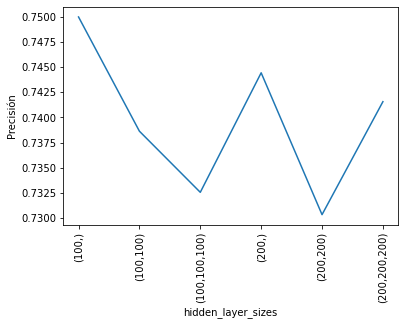

In [90]:
hidden_layer = [(100,),(100,100),(100,100,100),(200,),(200,200),(200,200,200)]
precision = []
for h in hidden_layer:
    neuronal_model = MLPClassifier(hidden_layer_sizes = h)
    neuronal_model.fit(X_tfidf, y_train)
    y_test_tfidf_predict = neuronal_model.predict(bow.transform(X_test))
    score =  precision_score(y_test, y_test_tfidf_predict)
    precision.append(score)

plt.plot(['(100,)','(100,100)','(100,100,100)','(200,)','(200,200)','(200,200,200)'], precision)
plt.xticks(rotation=90)
plt.xlabel('hidden_layer_sizes')
plt.ylabel('Precisión')
plt.show()

Como observamos la mejor precisión da con hidden_layer_sizes = (100,):

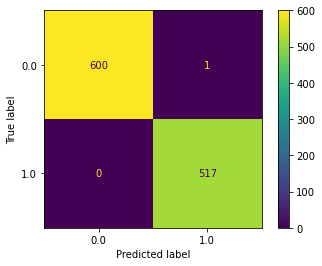

In [91]:
neuronal_model = MLPClassifier(hidden_layer_sizes = (100,))
neuronal_model.fit(X_tfidf, y_train)
y_train_tfidf_predict = neuronal_model.predict(X_tfidf)
y_test_tfidf_predict = neuronal_model.predict(bow.transform(X_test))
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

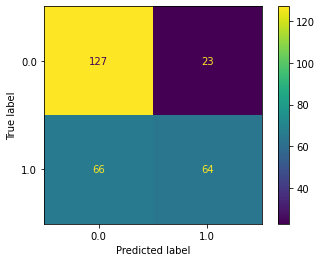

In [92]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)

In [93]:
print('Precisión:', precision_score(y_test, y_test_tfidf_predict))
print('Recall:', recall_score(y_test, y_test_tfidf_predict))
print('F1:', f1_score(y_test, y_test_tfidf_predict))

Precisión: 0.735632183908046
Recall: 0.49230769230769234
F1: 0.5898617511520737


In [94]:
results_name.append('Neuronal_TF-IDF')
results.append(precision_score(y_test, y_test_tfidf_predict))
parametros_results.append('n_neighbors = 5')
recall_results.append(recall_score(y_test, y_test_tfidf_predict))
f1_results.append(f1_score(y_test, y_test_tfidf_predict))

# RESULTADOS

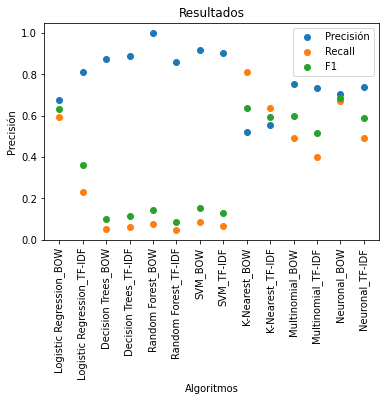

In [95]:
plt.scatter(results_name, results, label = 'Precisión')
plt.scatter(results_name, recall_results, label = 'Recall')
plt.scatter(results_name, f1_results, label = 'F1')
plt.xticks(rotation=90)
plt.xlabel("Algoritmos")
plt.ylabel("Precisión")
plt.title("Resultados")
plt.legend()
plt.show()

In [96]:
for i in range(0,len(results)):
    print('Para: ', results_name[i], '\n con los parámetros: ', parametros_results[i], 
          '\n se obtiene una precisión de: ', results[i] , '\n',
         'Recall: ', recall_results[i], '\n',
         'F1: ', f1_results[i], '\n')

Para:  Logistic Regression_BOW 
 con los parámetros:  random_state = 2 
 se obtiene una precisión de:  0.6754385964912281 
 Recall:  0.5923076923076923 
 F1:  0.6311475409836065 

Para:  Logistic Regression_TF-IDF 
 con los parámetros:  random_state = 2 
 se obtiene una precisión de:  0.8108108108108109 
 Recall:  0.23076923076923078 
 F1:  0.3592814371257485 

Para:  Decision Trees_BOW 
 con los parámetros:  max_depth = 3 
 se obtiene una precisión de:  0.875 
 Recall:  0.05384615384615385 
 F1:  0.10144927536231883 

Para:  Decision Trees_TF-IDF 
 con los parámetros:  max_depth = 3 
 se obtiene una precisión de:  0.8888888888888888 
 Recall:  0.06153846153846154 
 F1:  0.11510791366906475 

Para:  Random Forest_BOW 
 con los parámetros:  max_depth = 6, n_estimators = 300 
 se obtiene una precisión de:  1.0 
 Recall:  0.07692307692307693 
 F1:  0.14285714285714288 

Para:  Random Forest_TF-IDF 
 con los parámetros:  max_depth = 3, n_estimators = 200 
 se obtiene una precisión de:  0.8